# Task 1 IAD

Розглянути критерiй якостi кластеризацiї - ентропiю розбиття:

$$PE = -{\sum_{j=0}^N \sum_{k=1}^g u_{kj} \ln u_{kj} \over N},$$

де $N$ - задана кiлькiсть об’єктiв, якi кластеризуються, $1 \le g \le N$ - задана кiлькiсть кластерiв, $U = \{(u_{kj})|k = 1, ... ,g, j = 1, ... N\}$ - матриця розбиття, $u_{kj}\in(0, 1]$, причому $u_{kj}= 1$ означає приналежнiсть $j$-го об’єкту $k$-му кластеру. $\sum_{k=1}^g u_{kj} = 1, \sum_{j=1}^N u_{kj} \lt N.$

Використовуючи результати моделювання великої кiлькостi матриць розбиття, показати, що $$PE \in [0, \ln g]$$


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random

In [5]:
N = 1000 #кол-во кластеризируемых обьектов
g = 5 #кол-во кластеров

### Generarion of matrix and finding enthropy

In [6]:
def ugen():
    u_matrix = np.random.rand(g,N)
    u_matrix = u_matrix / u_matrix.sum(axis = 0,keepdims = 1)  #keepdims returned array 

    ln_u = np.log(u_matrix)  # matrix with ln(uij)
    pe = - np.sum(u_matrix* ln_u) / N
    return pe
    #print(pe)

In [7]:
ugen()

1.4367667948961298

### Plot

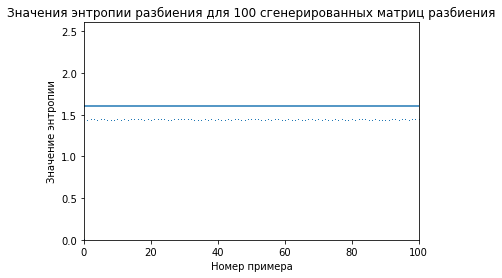

In [5]:
i = 0
resdata = np.array([0])
while i < 100:
    resdata = np.append(resdata, ugen())
    i = i + 1

#print(resdata)

plt.plot(np.arange(101), resdata, ',')
plt.axhline(y=math.log(g))
plt.title(u'Значения энтропии разбиения для 100 сгенерированных матриц разбиения')

plt.ylabel(u'Значение энтропии')
plt.xlabel(u'Номер примера')
plt.axis([0, 100, 0, math.log(g) + 1])
plt.show()

In [2]:
from sklearn.datasets import make_blobs

In [8]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0] , [2.0, 2.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
        centers=centers,
        cluster_std=clusters_std,
        random_state=0, shuffle=False)